In [1]:
!pip install -U pandas-profiling
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 61.4 MB/s 
     |████████████████████████████████| 102 kB 67.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 4.7 MB 46.6 MB/s 
     |████████████████████████████████| 690 kB 50.4 MB/s 
     |████████████████████████████████| 296 kB 47.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ca8141d17cc24dc0eef4dc4a7b8a138d9dffb0b3488e81edf50c4acbcbd0a673
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

In [2]:
!pip install category_encoders
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 80 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


# 1. EDA, 시각화
- 머신러닝에 적합한 형태로 데이터 타입을 변경
- 여러 테크닉을 사용해 결측치를 적절히 처리
- 본인의 전처리 과정에 대해 근거를 들어 설명
- 피쳐의 분포를 확인하고 이상치를 적절히 제거
- 1에서 세운 가설과 관련한 시각화 결과를 제시
- **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다**
  - Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?
  - 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?

## 데이터 불러오기

In [26]:
# 라이브러리 import
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeRegressor
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from catboost import Pool,CatBoostRegressor
SEED = 42

In [27]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/CodeStates Project 1/데이터/real_df.csv', index_col=0)
df.shape

(11976, 23)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11976 entries, 0 to 12775
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          11976 non-null  object 
 1   price          11976 non-null  int64  
 2   article        11976 non-null  object 
 3   like           11976 non-null  int64  
 4   view           11976 non-null  int64  
 5   category       11976 non-null  object 
 6   location       11976 non-null  object 
 7   time           8474 non-null   float64
 8   web_types      11976 non-null  int64  
 9   unused         11976 non-null  int64  
 10  model          11976 non-null  object 
 11  series         11976 non-null  object 
 12  size           11976 non-null  object 
 13  gps/cell       11976 non-null  object 
 14  edition        11976 non-null  object 
 15  material       11976 non-null  object 
 16  like/views(%)  11976 non-null  float64
 17  quality        11976 non-null  object 
 18  averag

In [29]:
from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()

In [30]:
# title에 미개봉이 있을 시 qualiyt = '상'으로 변경
ii = df[df['title'].str.contains("미개봉|미 개봉|미사용|미 사용|미착용|미 착용|새제품|새 제품|새상품|새 상품")].index.tolist()
for i in ii:
    df.loc[i, 'quality'] = '상'

## 태블로 데이터 가공

In [31]:
df1 = df[df['web_types']==0]

In [32]:
import math
df1['time'] = df1['time'].apply(math.trunc)

In [33]:
df_g3 = df1[(df1['model']=='갤럭시워치')&(df1['series']=='3')&(df1['size']=='45mm')&(df1['gps/cell']=='bluetooth')&(df1['edition']=='일반')&(df1['material']=='aluminium')&(df1['web_types']==0)]
df_g3.head()

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
5682,갤럭시워치3 45mm (블루투스) 팝니다,110000,\n- 45mm 검정색 블루투스모델입니다\n- 2021년 구입하자마자 힐링쉴드 강화...,6,147,디지털기기,인천,0,0,1,...,bluetooth,일반,aluminium,4.081633,상,105700.396825,13.05,1.030928,0.304897,0.994626
5683,갤럭시워치3 45mm,120000,\n갤럭시 워치 3 45mm 판매합니다\n상태좋구요\n배터리오래갑니다\n박스풀셋이구...,2,66,디지털기기,전북,0,0,0,...,bluetooth,일반,aluminium,3.030303,중,105700.396825,5.20,0.343643,0.136893,0.333305
5684,갤럭시 워치3 45mm 블루투스 7만에 팝니다.,70000,\n갤럭시 워치3 45mm 풀박스입니다. 메탈 & 가죽 2가지 스트랩 있습니다. ...,7,309,생활가전,울산,0,0,0,...,bluetooth,일반,aluminium,2.265372,중,105700.396825,22.10,1.202749,0.640906,1.174657
5685,갤럭시 워치3 45MM 블랙 팝니다,70000,"\n- 갤럭시 워치3 미스틱 블랙 45MM 입니다.\n-기기 기능 전혀 이상 없고,...",3,37,디지털기기,경기도,0,0,0,...,bluetooth,일반,aluminium,8.108108,중,105700.396825,4.70,0.515464,0.076743,0.493528
5686,갤럭시워치3 45mm,120000,\n블투용으로 잠깐 사용하던 갤럭시 워치3\n액정보호필름 되어있고 A급입니다.\n...,1,56,디지털기기,경북,0,0,0,...,bluetooth,일반,aluminium,1.785714,중,105700.396825,3.75,0.171821,0.116151,0.169038


In [34]:
df_g3.groupby('time').mean()[['price']]

,price
time,
0,105175.675676
1,104420.454545
2,103581.818182
3,102560.606061
4,99539.682540
5,97870.370370
6,99125.000000


In [35]:
df_g4 = df1[(df1['model']=='갤럭시워치')&(df1['series']=='4')&(df1['size']=='40mm')&(df1['gps/cell']=='bluetooth')&(df1['edition']=='일반')&(df1['material']=='aluminium')&(df1['web_types']==0)]
df_g4.head()

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
7898,갤럭시워치4-40mm,120000,\n스트랩부분이 살짝 색이 바랜거말고는 멀쩡해요 상자랑 없어서 저렴하게 내놔요\n다...,6,100,디지털기기,전남,0,0,0,...,bluetooth,일반,aluminium,6.000000,중,155442.526539,10.70,1.030928,0.207413,0.989752
7899,갤럭시워치4 40mm 블루투스,90000,\n약 6개월 사용 깨끗합니다.\n풀구성품 9만원에 날립니다.\n네고X\n,5,69,디지털기기,서울,0,0,0,...,bluetooth,일반,aluminium,7.246377,중,155442.526539,8.20,0.859107,0.143115,0.823307
7900,갤럭시 워치4 40mm,144000,\n달마다 돈내고 블루투스 없이 전화가능합니다.\n사시면 스트랩이랑 케이스2개 드립...,6,452,디지털기기,충남,0,0,0,...,bluetooth,일반,aluminium,1.327434,중,155442.526539,28.30,1.030928,0.937506,1.026257
7901,갤럭시워치4 40mm,150000,\n3개월전에 부모님 사드렸는데 사용하기 불편하신지 안쓰신다고 해서 판매합니다.\n...,7,106,디지털기기,인천,0,0,0,...,bluetooth,일반,aluminium,6.603774,중,155442.526539,11.95,1.202749,0.219858,1.153605
7902,갤럭시워치4 40mm LTE,140000,\n외관은 사진처럼 깔끔한편이고 액정보호필름부착중\n구성품은 충전기가 있습니다\n사...,12,540,디지털기기,서울,0,0,0,...,bluetooth,일반,aluminium,2.222222,중,155442.526539,38.40,2.061856,1.120030,2.014764


In [36]:
df_g4.groupby('time').mean()[['price']]

,price
time,
0,153614.814815
1,153048.000000
2,158900.000000
3,149646.017699
4,148627.450980
5,147340.425532
6,144962.962963


In [37]:
df_g5 = df1[(df1['model']=='갤럭시워치')&(df1['series']=='5')&(df1['size']=='40mm')&(df1['gps/cell']=='bluetooth')&(df1['edition']=='일반')&(df1['material']=='aluminium')&(df1['web_types']==0)]
df_g5.head()

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
9754,갤럭시워치5 핑크골드 40mm,250000,\n미개봉이고 22년 8월 제조상품입니다!\n도계동에서 거래합니당\n,3,65,디지털기기,경남,0,0,0,...,bluetooth,일반,aluminium,4.615385,중,244712.933754,6.1,0.515464,0.134818,0.496432
9755,갤럭시 워치 5 (Galaxy Watch 5) 40mm 블루투스 그래파이트,250000,\n- 새 제품; 미사용; 박스 개봉\n- 네고 가능\n- 아이폰과 연동이 안돼서 ...,1,45,디지털기기,서울,0,0,0,...,bluetooth,일반,aluminium,2.222222,중,244712.933754,3.2,0.171821,0.093336,0.167897
9756,갤럭시 워치5 핑크 40mm 블루투스 S급 팔아요,250000,\n와이프 사줬는데 안찬다해서 바로 팔아요\n박스는 버렸어요\n기스없고 연결도 안해...,6,76,디지털기기,강원도,0,0,1,...,bluetooth,일반,aluminium,7.894737,상,244712.933754,9.5,1.030928,0.157634,0.987263
9757,갤럭시워치5(블루투스) 실버 40mm 팝니다.,230000,\n주문시기는 8월 31일이고 9월 1일날 받았습니다.\n딱 1번 착용했는데 사이즈...,3,53,디지털기기,서울,0,0,0,...,bluetooth,일반,aluminium,5.660377,중,244712.933754,5.5,0.515464,0.109929,0.495187
9759,갤럭시 워치5 40mm 실버 (미개봉),250000,\n미개봉 새상품입니다 🤩\n실버가 어떤 스트랩을 껴도 예쁜 색상이에요\n고척동에서...,2,28,디지털기기,서울,0,0,1,...,bluetooth,일반,aluminium,7.142857,상,244712.933754,3.3,0.343643,0.058076,0.329364


In [38]:
df_g5.groupby('time').mean()[['price']]

,price
time,
0,246106.060606
1,250159.090909
2,240102.040816
3,240243.902439
4,243243.243243
5,243695.652174
6,252000.000000


In [39]:
df_aw_6 = df1[(df1['model']=='애플워치')&(df1['series']=='6')&(df1['size']=='40mm')&(df1['gps/cell']=='gps')&(df1['edition']=='일반')&(df1['material']=='aluminium')&(df1['web_types']==0)]
df_aw_6.head()

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
3780,애플워치 6 40mm,257000,\n애플워치6 40미리 입니다\n기스 사진 에 다 첨부하였습니다\n배터리 효율100...,6,675,디지털기기,경기도,0,0,0,...,gps,일반,aluminium,0.888889,중,293774.509804,39.45,1.030928,1.400037,1.049383
3781,애플워치6 40mmgps,380000,\n21년6월구매\n몇번차고나가지않았어요\n사자말자 필름이랑 케이스씌웟구요\n정품 ...,2,207,디지털기기,경북,0,0,0,...,gps,일반,aluminium,0.966184,중,293774.509804,12.25,0.343643,0.429345,0.347928
3782,애플워치6 40mm gps 배터리성능100%애플케어남음,280000,\n빠르게 처분하기 위해서\n최종 가격 내립니다. \n2020.10월 구매\n애플워...,8,62,디지털기기,경기도,0,0,0,...,gps,일반,aluminium,12.903226,중,293774.509804,10.70,1.374570,0.128596,1.312272
3783,애플워치6 40mm GPS 나이키 에디션 팝니다,250000,\n케이스랑 필름씌워서 사용하여 기스 거의 제로입니다\n나이키 에디션 풀박스 상품입...,23,640,디지털기기,충북,0,0,0,...,gps,일반,aluminium,3.593750,중,293774.509804,53.85,3.951890,1.327443,3.820668
3784,애플워치6 40mm 스그 풀박,350000,"\n잔기스 없고 붙이는 필름,스트랩 여러개 있습니다!\n쿨거래 환영!\n반품x\n",0,22,디지털기기,경기도,0,0,0,...,gps,일반,aluminium,0.000000,중,293774.509804,1.10,0.000000,0.045631,0.002282


In [40]:
df_aw_6.groupby('time').mean()[['price']]

,price
time,
0,279000.000000
1,268347.826087
2,272741.935484
3,296730.769231
4,271423.076923
5,212500.000000


In [41]:
df_aw_7 = df1[(df1['model']=='애플워치')&(df1['series']=='7')&(df1['size']=='41mm')&(df1['gps/cell']=='gps')&(df1['edition']=='일반')&(df1['material']=='aluminium')&(df1['web_types']==0)]
df_aw_7.head()

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
34,애플워치7 41 wifi 미드나이트,370000,\n작년에 구매했고 잘 사용안해서 판매합니다.\n배터리 성능 99%입니다.\n스트랩...,0,21,디지털기기,경기도,0,0,0,...,gps,일반,aluminium,0.000000,중,381197.586727,1.05,0.000000,0.043557,0.002178
35,애플워치7 스타라이트 GPS 41mm,399000,\n이미 44를 사용중이라 보관 해두고있는 41은 판매하려고합니다 :) \n2022...,0,23,디지털기기,대구,0,0,1,...,gps,일반,aluminium,0.000000,상,381197.586727,1.15,0.000000,0.047705,0.002385
36,애플워치 7 나이키에디션 블랙 41mm gps,350000,\n상태 매우좋음\n풀박스(전용 충전기 포함)\n배터리 효율 100\n투명 케이스 ...,3,56,디지털기기,대전,0,0,0,...,gps,일반,aluminium,5.357143,중,381197.586727,5.65,0.515464,0.116151,0.495498
37,"애플워치7 그린 41mm gps S급, 신품급 판매합니다.",360000,"\n애플워치7 그린 41mm gps S급, 신품급 판매합니다. \n사진처럼 보증기간...",1,37,디지털기기,서울,0,0,1,...,gps,일반,aluminium,2.702703,상,381197.586727,2.80,0.171821,0.076743,0.167067
38,"애플워치7 그린 41mm gps S급, 신품급 판매합니다.",360000,"\n애플워치7 그린 41mm gps S급, 신품급 판매합니다. \n사진처럼 보증기간...",1,21,디지털기기,서울,0,0,1,...,gps,일반,aluminium,4.761905,상,381197.586727,2.00,0.171821,0.043557,0.165408


In [42]:
df_aw_7.groupby('time').mean()[['price']]

,price
time,
0,376039.215686
1,380964.601770
2,372865.853659
3,374595.238095
4,369896.551724
5,377333.333333


## 시각화

In [43]:
df.head()

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
0,애플워치 7 스테인리스 41mm실버 팝니다,600000,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,...,gps,일반,stainless,1.202749,중,635185.185185,71.50,2.405498,2.414287,2.405938
1,애플워치7 41mm 스테인리스 미사용팝니다,650000,\n처음에 한번켜보고 초기셋팅후 바로 박스에 보관되었던 제품입니다\n본체만입니다 밀...,3,118,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.542373,상,635185.185185,8.75,0.515464,0.244747,0.501928
2,애플워치7 41mm 스테인리스 실버 미사용팝니다,650000,\n본체만 있습니다 밀레니즈루프줄은 팔리고 없습니다\n스타라이트 스포츠밴드 하나 가...,3,123,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.439024,상,635185.185185,9.00,0.515464,0.255118,0.502447
3,애플워치 7 스테인리스 스틸 41mm,700000,"\n애플워치 7 스테인리스 스틸 41mm gps+셀룰러 모델이고, 그래파이트 색상입...",2,123,디지털기기,충남,1.000000,0,0,...,gps,일반,stainless,1.626016,중,635185.185185,8.05,0.343643,0.255118,0.339216
4,애플워치 7 41mm 골드 스테인리스 새제품,880000,\n1달전 구매후 1회 말그대로 시착만 하고 디지털 시계가 안어울려\n내놓습니다 \...,0,65,디지털기기,서울,2.000000,0,0,...,gps,일반,stainless,0.000000,상,635185.185185,3.25,0.000000,0.134818,0.006741


In [44]:
# 컬럼 간 상관 관계 분석
import matplotlib.pyplot as plt
df.corr()   

,price,like,view,time,web_types,unused,like/views(%),average_price,attention,like(%),view(%),attention(%)
price,1.000000,-0.103687,-0.035975,-0.097642,0.142805,0.164651,-0.127656,0.897373,-0.062156,-0.103687,-0.035975,-0.102839
like,-0.103687,1.000000,0.658489,0.028473,-0.001608,-0.012654,0.290933,-0.068406,0.830212,1.000000,0.658489,0.999813
view,-0.035975,0.658489,1.000000,0.127557,-0.021488,-0.019716,-0.102959,-0.006594,0.966215,0.658489,1.000000,0.672901
time,-0.097642,0.028473,0.127557,1.000000,NaN,-0.001434,-0.152149,-0.094376,0.105454,0.028473,0.127557,0.031517
web_types,0.142805,-0.001608,-0.021488,NaN,1.000000,-0.014709,0.060545,0.080173,-0.016467,-0.001608,-0.021488,-0.002132
unused,0.164651,-0.012654,-0.019716,-0.001434,-0.014709,1.000000,-0.006948,0.077246,-0.018938,-0.012654,-0.019716,-0.012944
like/views(%),-0.127656,0.290933,-0.102959,-0.152149,0.060545,-0.006948,1.000000,-0.100870,0.023374,0.290933,-0.102959,0.283320
average_price,0.897373,-0.068406,-0.006594,-0.094376,0.080173,0.077246,-0.100870,1.000000,-0.028311,-0.068406,-0.006594,-0.067406
attention,-0.062156,0.830212,0.966215,0.105454,-0.016467,-0.018938,0.023374,-0.028311,1.000000,0.830212,0.966215,0.840824
like(%),-0.103687,1.000000,0.658489,0.028473,-0.001608,-0.012654,0.290933,-0.068406,0.830212,1.000000,0.658489,0.999813


In [45]:
df['attention(%)'].describe()

count    11976.000000
mean         0.988717
std          1.455287
min          0.000104
25%          0.186849
50%          0.661269
75%          1.218862
max         49.372287
Name: attention(%), dtype: float64

- attention과 view의 상관관계가 like 보다 높다 -> 조절 필요

model
갤럭시워치    189174.541830
애플워치     292744.921798
Name: average_price, dtype: float64


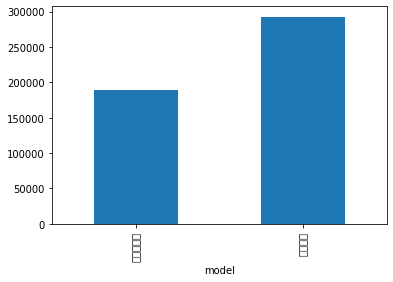

In [46]:
# 갤럭시워치와 애플워치의 평균 가격
print(df.groupby('model')['average_price'].mean())
df.groupby('model')['average_price'].mean().plot.bar()

series
1      65000.000000
2      85529.411765
3     136580.151515
4     218800.505051
5     264058.945263
6     350865.877682
7     429606.081222
se    256855.474926
Name: average_price, dtype: float64


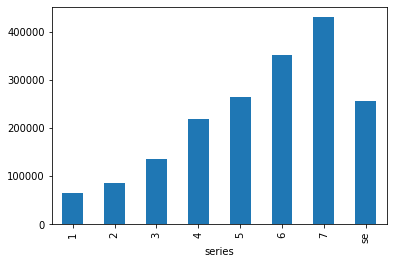

In [47]:
# 애플워치 시리즈별 평균 가격
apple = df[df['model']=='애플워치']
print(apple.groupby('series')['average_price'].mean())
apple.groupby('series')['average_price'].mean().plot.bar()

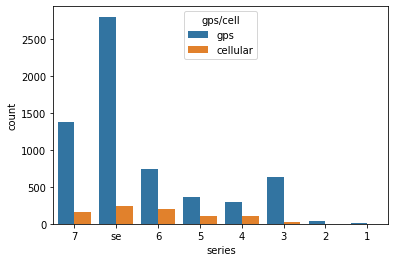

In [48]:
sns.countplot(x='series', hue='gps/cell', data=apple)

# 2. 상관분석
- 가정) attention과 price 간에는 유의미한 상관관계가 있을 것이다.
    - 귀무가설 H<sub>0</sub> : ρ<sub>XY</sub> = 0
    - 대립가설 H<sub>1</sub> : ρ<sub>XY</sub> < 0
- 'price' 와 'attention' 외 조건이 동일한 data 대상으로 상관분석 진행
- 가장 데이터가 많은 "애플워치se 40mm gps 일반 aluminium 미개봉 데이터"로 분석
    - 시계열의 특징이 보이므로 (최근에 업로드된 게시물일수록 like 수가 적다)  time도 동일하게 설정(=3) -> 26개의 데이터


{'whiskers': [<matplotlib.lines.Line2D at 0x7fedc5c53490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedc5108510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedc5101450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fedc5108fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fedc510e550>],
 'means': []}

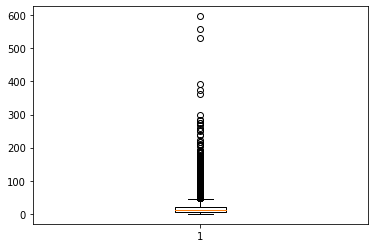

In [50]:
plt.boxplot(df['attention'])

In [51]:
df['attention'].describe()

count    11976.000000
mean        18.731421
std         24.309138
min          0.050000
25%          6.300000
50%         11.825000
75%         22.400000
max        596.500000
Name: attention, dtype: float64

In [52]:
df.sort_values('attention', ascending=False)[:20]

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
3707,애플워치se 셀룰러 44 나이키 실버 미개봉,100000,애플워치 se 실버 나이키 44 셀룰러 미개봉 구합니다.\n스트랩 있는데 안쓰거 있...,14,11664,웨어러블(워치),전국,NaN,1,1,...,cellular,일반,aluminium,0.120027,상,296518.115942,596.50,2.405498,24.192645,3.494856
2272,(미개봉) 애플워치 se 40mm gps 실버 스페이스그레이,295000,애플워치 se 40mm gps 미개봉 \n\n직거래 언주역이고 택배는 우체국택배 이...,299,5462,웨어러블(워치),서울,NaN,1,1,...,gps,일반,aluminium,5.474185,상,246803.881808,557.15,51.374570,11.328895,49.372287
2336,애플워치 se 40mm 실버 ㅍㅍ,210000,"애플워치 판매합니다\n스트랩은 정품 흰색 스트랩은 없구요 회색 스트랩이랑 , 흰색 ...",280,5281,웨어러블(워치),대구,NaN,1,0,...,gps,일반,aluminium,5.302026,중,246803.881808,530.05,48.109966,10.953477,46.252141
11528,애플워치5 40mm,400000,"풀박, 제조년도 2020년\n생활기스 미세하게있습니다.(예민하신분 ㄱㅓ래x)\n사용...",64,6632,웨어러블(워치),서울,NaN,1,0,...,gps,일반,aluminium,0.965018,하,224587.405594,392.40,10.996564,13.755626,11.134517
2271,[미개봉] 애플워치 SE 나이키 에디션 40 새제품,340000,애플 공홈 정품입니다. \n\n밴드는 나이키 이며 화이트 실버 입니다. \n\n비닐...,170,4235,웨어러블(워치),충남,NaN,1,0,...,gps,일반,aluminium,4.014168,상,246803.881808,373.25,29.209622,8.783938,28.188338
11785,애플워치4 44mm,210000,안녕하세요 애플워치 판매하려고 올립니다\n하자는 왼쪽 화면 위에 조금 긁혔고요 쓰시...,79,5748,웨어러블(워치),서울,NaN,1,0,...,gps,일반,aluminium,1.374391,하,199225.609756,362.45,13.573883,11.922096,13.491294
11772,애플워치 4 44mm 나이키 에디션,220000,풀박스 다 있음.생활기스정도있음.,45,5114,웨어러블(워치),경기도,NaN,1,0,...,gps,일반,aluminium,0.879937,하,199225.609756,298.45,7.731959,10.607098,7.875716
1318,"(미개봉)애플워치7 나이키 41,45mm + 셀룰러",449000,번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\...,96,3859,웨어러블(워치),서울,NaN,1,0,...,cellular,일반,aluminium,2.487691,상,503958.904110,284.15,16.494845,8.004065,16.070306
660,"(미개봉)애플워치7 나이키 41,45mm + 셀룰러",449000,번개페이 환영입니다! 네고는 정중히 사양합니다🙂\n믿을 수 있는 거래량과 후기!!\...,96,3859,웨어러블(워치),서울,NaN,1,0,...,cellular,일반,aluminium,2.487691,상,462729.166667,284.15,16.494845,8.004065,16.070306
2683,미개봉 애플워치se 40미리 나이키 실버 착불,325000,미개봉 정품 gps 모델입니다\n​나이키실버 입니다\n네고는 없으며 택배는 3000...,91,3759,웨어러블(워치),경기도,NaN,1,1,...,gps,일반,aluminium,2.420857,상,246803.881808,274.40,15.635739,7.796652,15.243785


In [53]:
df_1 = df[(df['attention']<300)&(df['web_types']==0)]
df_1['time'] = df_1['time'].apply(math.trunc)

In [54]:
df_se = df_1[(df_1['model']=='애플워치')&(df_1['series']=='se')&(df_1['size']=='40mm')&(df_1['gps/cell']=='gps')&(df_1['edition']=='일반')&(df_1['material']=='aluminium')&(df_1['quality']=='상')&(df_1['time']==3)]

In [55]:
import scipy.stats as stats
stats.pearsonr(df_se['price'],df_se['attention'])

(-0.5441826243011366, 0.0006017434829348181)

- 유의수준 1% 이내에서 귀무가설 기각!
- price와 attention은 -0.544의 상관계수를 가지는 음의 관계

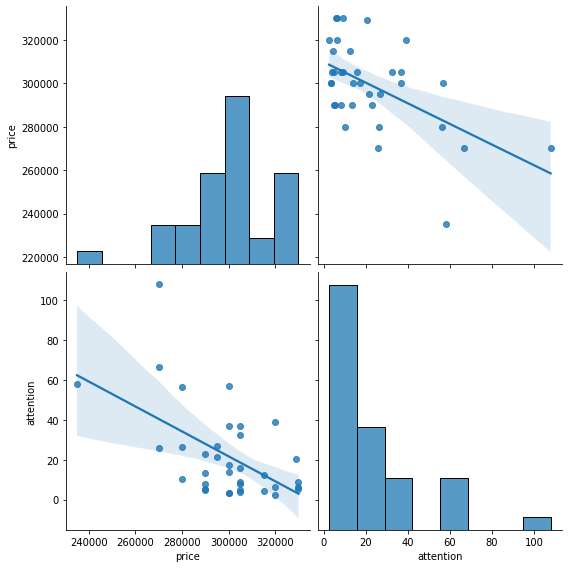

In [56]:
import seaborn as sns
sns.pairplot(df_se[['price', 'attention']], kind='reg', height=4) 

In [57]:
df_se[['price', 'attention']].head()

,price,attention
1863,305000,15.95
1866,300000,13.60
1876,315000,12.20
1879,300000,17.10
1889,300000,36.60


# 3. Modeling
- catboost 사용
- 범주형 col = 9개
- 수치형 col = 2개

In [58]:
!pip install optuna

In [59]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [60]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/CodeStates Project 1/데이터/real_real_df.csv', index_col=0)

In [61]:
df_new = df[['model', 'series', 'size', 'gps/cell', 'edition', 'material' ,'quality', 'unused', 'location', 'price', 'attention']]

In [62]:
# 데이터 split (train/test) 0.8 / 0.2
from sklearn.model_selection import train_test_split

target = 'attention'
X = df_new.drop(columns=target)
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=2, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2, shuffle=True)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (8148, 10)
y_train shape (8148,)
X_val shape (2037, 10)
y_val shape (2037,)
X_test shape (1798, 10)
y_test shape (1798,)


In [63]:
# baseline 모델 설정_단순한 tree model

pipe = make_pipeline(
    OneHotEncoder(), 
    DecisionTreeRegressor(max_depth=5)
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

print('기준 모델의 rmse : ', mse(y_val, y_pred)**0.5)
print('기준 모델의 r2 score :', r2_score(y_val, y_pred))

기준 모델의 rmse :  39.663655094845105
기준 모델의 r2 score : -0.019101542400124405


In [64]:
# catboost model
pipe = make_pipeline(
    TargetEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE')
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

print('catboost 모델의 rmse : ', mse(y_val, y_pred)**0.5)
print('catboost 모델의 r2 score :', r2_score(y_val, y_pred))

Learning rate set to 0.057033
0:	learn: 50.9723302	total: 48ms	remaining: 48s
1:	learn: 50.9169677	total: 50.2ms	remaining: 25.1s
2:	learn: 50.7813809	total: 52.1ms	remaining: 17.3s
3:	learn: 50.5208719	total: 54.3ms	remaining: 13.5s
4:	learn: 50.4062311	total: 56.2ms	remaining: 11.2s
5:	learn: 50.1682502	total: 58.3ms	remaining: 9.65s
6:	learn: 49.9445936	total: 60.5ms	remaining: 8.58s
7:	learn: 49.7297849	total: 62.5ms	remaining: 7.75s
8:	learn: 49.5896134	total: 64.7ms	remaining: 7.13s
9:	learn: 49.3840597	total: 66.7ms	remaining: 6.6s
10:	learn: 49.1996668	total: 68.9ms	remaining: 6.2s
11:	learn: 49.0631368	total: 71ms	remaining: 5.84s
12:	learn: 48.9429036	total: 73ms	remaining: 5.54s
13:	learn: 48.9006638	total: 75.1ms	remaining: 5.29s
14:	learn: 48.8935221	total: 77.3ms	remaining: 5.08s
15:	learn: 48.8785759	total: 79.4ms	remaining: 4.88s
16:	learn: 48.7166701	total: 81.5ms	remaining: 4.71s
17:	learn: 48.5562836	total: 83.6ms	remaining: 4.56s
18:	learn: 48.3801310	total: 85.8ms	

In [65]:
encoder = TargetEncoder()
encoder.fit(X_train, y_train)
X_train_en = encoder.transform(X_train)

In [66]:
encoder.fit(X_val, y_val);
X_val_en = encoder.transform(X_val)

In [67]:
# random sampler
from sklearn.metrics import mean_squared_error
sampler = TPESampler(seed=42)

# define function
def objective(trial):

    cbrm_param = {
        'iterations':trial.suggest_int("iterations", 4000, 25000),
        'od_wait':trial.suggest_int('od_wait', 500, 2300),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0),
        'eval_metric' : 'R2',
        'verbose' : False
    }

    # Generate model
    model = CatBoostRegressor(**cbrm_param)
    model = model.fit(X_train_en, y_train, eval_set=[(X_val_en, y_val)], 
                           verbose=0, early_stopping_rounds=400, use_best_model=True)
                           
    RMSE = mean_squared_error(y_val, model.predict(X_val_en))**0.5
    return RMSE

optuna_cbrm = optuna.create_study(direction='minimize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=1000)

[I 2022-09-14 01:35:07,487] A new study created in memory with name: no-name-a396c2bb-f681-4a27-a524-96c3dcdd7b50
[I 2022-09-14 01:35:08,328] Trial 0 finished with value: 38.97278083326495 and parameters: {'iterations': 11865, 'od_wait': 2212, 'learning_rate': 0.7346740023932911, 'reg_lambda': 59.86585243311882, 'subsample': 0.15601864044243652, 'random_strength': 16.239780813448107, 'depth': 1, 'min_data_in_leaf': 26, 'leaf_estimation_iterations': 10, 'bagging_temperature': 6.79657809075816, 'colsample_bylevel': 0.41235069657748147}. Best is trial 0 with value: 38.97278083326495.
[I 2022-09-14 01:35:09,910] Trial 1 finished with value: 36.78032359721153 and parameters: {'iterations': 24369, 'od_wait': 1999, 'learning_rate': 0.2202157195714934, 'reg_lambda': 18.182504902460387, 'subsample': 0.18340450985343382, 'random_strength': 22.16968971838151, 'depth': 8, 'min_data_in_leaf': 13, 'leaf_estimation_iterations': 5, 'bagging_temperature': 2.801635158716261, 'colsample_bylevel': 0.48369

In [72]:
cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))

Best Trial: score 28.344289684585576,
params {'iterations': 19891, 'od_wait': 831, 'learning_rate': 0.9311862400963029, 'reg_lambda': 5.953291226690203, 'subsample': 0.36994817895636123, 'random_strength': 22.02757421506451, 'depth': 6, 'min_data_in_leaf': 9, 'leaf_estimation_iterations': 9, 'bagging_temperature': 0.3199850156232718, 'colsample_bylevel': 0.6359477279694682}


In [73]:
import pickle
with open('pipe.pkl','wb') as pickle_file:
    pickle.dump(pipe, pickle_file)